In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [6]:
df_test = pd.read_csv('test.csv')

In [7]:
df_test.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14


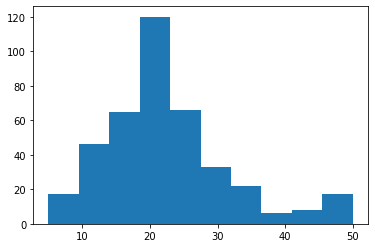

In [8]:
plt.hist(df['MEDV'])
plt.show()

In [9]:
#Loading train data
phi = np.loadtxt('train.csv', dtype='float', delimiter=',', skiprows=1, usecols=tuple(range(1, 14)))

In [10]:
#Loading test data
phi_test = np.loadtxt('test.csv', dtype='float', delimiter=',', skiprows=1, usecols=tuple(range(1,14)))

In [11]:
#Loading train output labels to y
y = np.loadtxt('train.csv', dtype='float', delimiter=',', skiprows=1, usecols=14, ndmin=2)

In [12]:
#Checking on the shape of each
print(phi.shape, phi_test.shape, y.shape)

(400, 13) (105, 13) (400, 1)


In [13]:
# Add a column of 1s to right of phi and phi_test
phi_test = np.concatenate((phi_test, np.ones((105, 1))), axis=1)
phi = np.concatenate((phi, np.ones((400, 1))), axis=1)

In [14]:
#Apply min max scaling on each column of phi and phi_test
from sklearn.preprocessing import MinMaxScaler
func = MinMaxScaler(feature_range=(0,1))
func.fit(phi)
phi = func.transform(phi)
phi_test = func.transform(phi_test)

In [15]:
#Applying log scaling on output
y = np.log(y)

In [16]:
# Function to calculate change in error function
def delta_w(p, phi, w):
    if p == 2:
        deltaw = (2 * (np.dot(np.dot(np.transpose(phi), phi), w) -
                       np.dot(np.transpose(phi), y)) +
                  lambd * p * np.power(np.absolute(w), (p - 1)))
    if p < 2 and p > 1:
        deltaw = (2 * (np.dot(np.dot(np.transpose(phi), phi), w) -
                       np.dot(np.transpose(phi), y)) +
                  lambd * p * np.power(np.absolute(w), (p - 1)) * np.sign(w))
    return deltaw

In [17]:
# Dictionary containing filenames as keys and p as values
filenames = {'output_l2.csv': 2.0,
             'output_p1.csv': 1.75,
             'output_p2.csv': 1.5,
             'output_p3.csv': 1.3
             }

In [18]:
# For each item in this dictionary
for (fname, p) in filenames.items():
    # Set initial w to zeros
    w = np.zeros((14, 1))
    # Hyperparameter lambda value
    lambd = 0.2
    # Maximum step size
    t = 0.00012

    # Calculate new value of w
    w_new = w - t * delta_w(p, phi, w)

    i = 0
    # Repeat steps until error between consecutive w is less than threshold
    while(np.linalg.norm(w_new-w) > 10 ** -10):
        w = w_new
        w_new = w - t * delta_w(p, phi, w)
        i = i + 1
    #print("No.of iterations for p={}:{}",p,i)
    # Load values of id
    id_test = np.loadtxt('test.csv', dtype='int', delimiter=',',
                         skiprows=1, usecols=0, ndmin=2)

    # Calculate y for test data
    y_test = np.exp(np.dot(phi_test, w_new))
    df_test[fname] = y_test
    # Save the ids and y
    np.savetxt(fname, np.concatenate((id_test, y_test), axis=1),
               delimiter=',', fmt=['%d', '%f'], header='ID,MEDV', comments='')

Outputs of each case have been saved as different files.Here I have added these outputs as columns to the dataframe for better readability.

In [19]:
df_test

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,output_l2.csv,output_p1.csv,output_p2.csv,output_p3.csv
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40,21.308879,21.227376,21.212540,21.202891
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12,22.882087,22.914278,22.932679,22.948583
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69,5.273359,5.275525,5.286807,5.292653
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,29.036429,29.025491,29.078914,29.116071
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14,10.951298,10.976464,10.997946,11.016213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,100,0.19073,22.0,5.86,0,0.431,6.718,17.5,7.8265,7,330.0,19.1,393.74,6.56,31.050466,31.148373,31.222448,31.275916
101,101,6.96215,0.0,18.10,0,0.700,5.713,97.0,1.9265,24,666.0,20.2,394.43,17.11,17.458803,17.283535,17.236925,17.209566
102,102,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243.0,16.8,396.90,5.28,25.076070,25.130050,25.172126,25.202930
103,103,0.10469,40.0,6.41,1,0.447,7.267,49.0,4.7872,4,254.0,17.6,389.25,6.05,38.931203,38.966209,38.956549,38.925529
